# Circuitos RLC

Un circuito RLC consiste de al menos una resistencia, un inductor y un capacitor. La configuración del circuito puede ser en serie o en paralelo, y en su forma más simple el sistema que se obtiene es de segundo orden.

## RLC en serie

Usando la LVK se obtiene la ecuación diferencial que modela el circuito RLC:

$$ v(t) = v_r + v_L + v_C $$ 
$$ v(t) = Ri(t) + L\frac{di(t)}{dt} + \frac{1}{C}\int_{t_0}^{t}i(d)dt $$ 

Teniendo en cuenta que: 

$ i_R(t) = i_C(t) = i_L(t) = C\frac{dv_c(t)}{dt} $ 

$$ v(t) = RC\frac{dv_c(t)}{dt} + LC\frac{d[dv_c(t)]}{dt} + \frac{1}{C}\int_{t_0}^{t}C\frac{dv_c(t)}{dt}dt $$

$$ v(t) = LC\frac{d^2v_c(t)}{dt} + RC\frac{dv_c(t)}{dt} + v_c(t) $$

Normalizando la ecuacion diferencial, llegamos a la expresión: 

$$ \frac{1}{LC}v(t) = \frac{d^2v_c(t)}{dt} + \frac{R}{L}\frac{dv_c(t)}{dt} + \frac{1}{LC}v_c(t)$$
$$ \frac{1}{LC}v(t) = \ddot v_c(t) + \frac{R}{L}\dot v_c(t) + \frac{1}{LC}v_c(t)$$

In [121]:
import sympy
from sympy import init_printing
init_printing(use_latex=True)
%matplotlib inline

In [122]:
t = sympy.symbols('t')

In [123]:
# Definicion de los parametros del circuito
R = 1
L = 1
C = 1

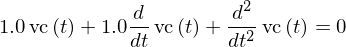

In [124]:
# Definicion del modelo matematico
vc = sympy.Function('vc')
v = sympy.Function('v')
series_model = sympy.Eq(vc(t).diff(t, t) + (R/L)*vc(t).diff(t) + 1/(L*C)*vc(t), 0)
series_model

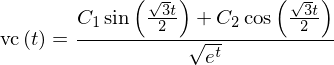

In [125]:
# Solucion homogenea (v(t) = 0)
solution_series = sympy.dsolve(series_model, vc(t))
solution_series

In [126]:
# Solucion no homogenea (v(t) != 0)

In [127]:
import lcapy
from lcapy import Circuit

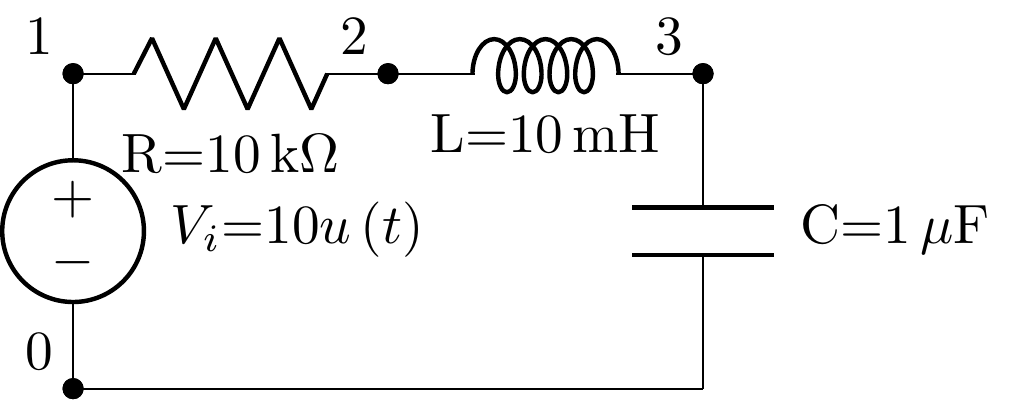

In [128]:
series_rlc_cct = Circuit()
series_rlc_cct.add(
'''
Vi 1 0 step 10; down
R 1 2 10e3; right
L 2 3 10e-3; right
C 3 0_2 1e-6; down
W 0 0_2; right
''')
series_rlc_cct.draw(style='american')

In [140]:
series_rlc_cct.R.V

⎧                      2          ⎫
⎪            10000000⋅s           ⎪
⎨s: ──────────────────────────────⎬
⎪    4            3              2⎪
⎩   s  + 1000000⋅s  + 100000000⋅s ⎭

In [150]:
import numpy as np
t = np.linspace(0, 0.5, 1000)
vr = series_rlc_cct.R.v.evaluate(t)
vl = series_rlc_cct.L.v.evaluate(t)
vc = series_rlc_cct.C.v.evaluate(t)

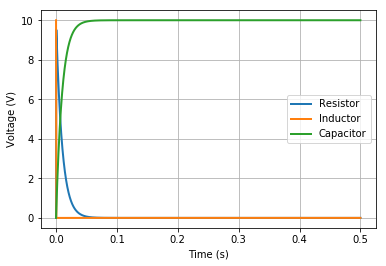

In [152]:
from matplotlib.pyplot import figure, savefig, show
fig = figure()
ax = fig.add_subplot(111)
ax.plot(t, vr, linewidth=2)
ax.plot(t, vl, linewidth=2)
ax.plot(t, vc, linewidth=2)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage (V)')
ax.legend(['Resistor','Inductor','Capacitor'])
ax.grid(True)
show()